In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import t as student_t
%matplotlib inline

In [2]:
# number of data pairs
N = 10

In [3]:
Gauss1 = stats.norm(0, 1) # mean = 0, stdev = 1 
G1 = Gauss1.rvs(N)
Gauss2 = stats.norm(0, 1) # mean = 0, stdev = 1 
G2 = Gauss2.rvs(N)

Text(0, 0.5, '$G_2$')

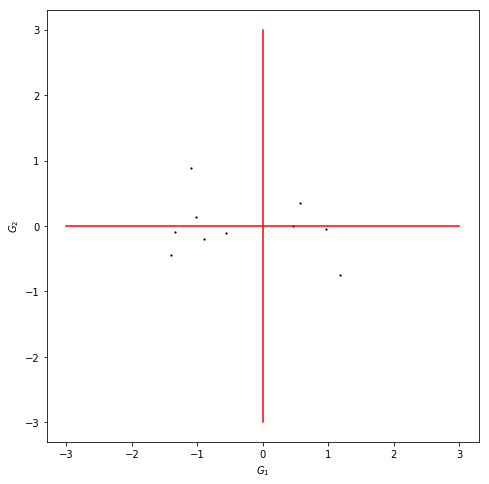

In [4]:
fig = plt.figure(figsize=(2, 2))
ax = plt.axes([-3, -3, 3, 3])
plt.scatter(G1, G2, s=5, lw=0, c='k')
ax.plot([-3, 3], [0, 0], '-r') 
ax.plot([0, 0], [-3, 3], '-r') 
plt.xlabel(r'$G_1$')
plt.ylabel(r'$G_2$')

In [5]:
# Pearson's correlation coefficient from eq.3.102
def computePCC(x,y):
    meanX = np.mean(x)
    meanY = np.mean(y)
    S1 = np.sum((x-meanX)*(y-meanY))
    S2 = np.sum((x-meanX)**2)
    S3 = np.sum((y-meanY)**2)
    return S1/np.sqrt(S2*S3)

In [6]:
def getData(N):
    Gauss1 = stats.norm(0, 1) # mean = 0, stdev = 1 
    G1 = Gauss1.rvs(N)
    Gauss2 = stats.norm(0, 1) # mean = 0, stdev = 1 
    G2 = Gauss2.rvs(N)
    return G1, G2 

In [7]:
Nsample = 10000 
r = np.zeros(Nsample)
# alternative computation using scipy.stats
rS = np.zeros(Nsample)
p = np.zeros(Nsample)
for i in range(0,Nsample):
    x,y = getData(N)
    r[i] = computePCC(x, y)
    rS[i], p[i] = stats.pearsonr(x, y)

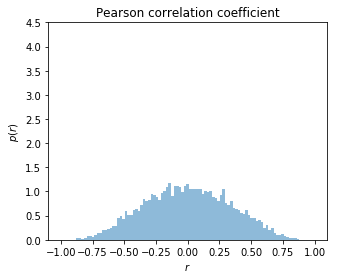

In [12]:
## let's plot the r histogram 
fig, ax = plt.subplots(figsize=(5, 4))
# histogram the data
ax.hist(r, bins=np.linspace(-1, 1, 100),
            histtype='stepfilled', alpha=0.5, density=True)

plt.xlabel('$r$')
plt.ylabel(r'$p(r)$')
plt.xlim(-1.1, 1.1)
plt.ylim(0.0, 4.5)
plt.title('Pearson correlation coefficient')
plt.show()

Text(0, 0.5, '$p$')

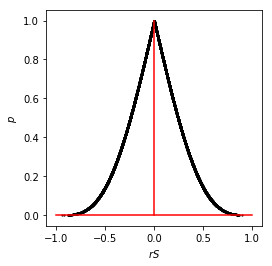

In [13]:
fig = plt.figure(figsize=(3, 3))
ax = plt.axes([-1, 0, 1, 1])
plt.scatter(rS, p, s=5, lw=0, c='k')
ax.plot([-1, 1], [0, 0], '-r') 
ax.plot([0, 0], [-0, 1], '-r') 
plt.xlabel(r'$rS$')
plt.ylabel(r'$p$')

In [10]:
k = N-2
t = r * np.sqrt(k/(1-r**2))

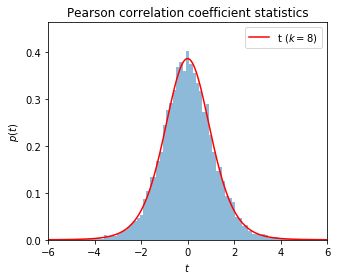

In [11]:
## now plot the histogram and compare to expectation
fig, ax = plt.subplots(figsize=(5, 4))
# histogram the data
ax.hist(t, bins=np.linspace(-7, 7, 100),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected Student's distribution
Student_dist = student_t(k, 0)
xgrid = np.linspace(-10, 10, 1000)
StudentPDF = Student_dist.pdf(xgrid)
yMax = 1.2*np.max(StudentPDF)
label = r'$\mathrm{t} \,\, (k=%.0f)$' % k
plt.plot(xgrid, StudentPDF, ls='-', c='red', label=label)

plt.xlabel('$t$')
plt.ylabel(r'$p(t)$')
plt.xlim(-6, 6)
plt.ylim(0.0, yMax)
plt.title('Pearson correlation coefficient statistics')
plt.legend()
plt.show()